# Predicting Customer Churn

In [46]:
#import libraries
import pandas as pd
import numpy as np
import math
import seaborn as sns


import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import mutual_info_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

from sklearn.model_selection import RandomizedSearchCV 
from sklearn.model_selection import GridSearchCV 

from sklearn.model_selection import KFold

from sklearn.metrics import classification_report, confusion_matrix

#plt.rcParams["figure.figsize"] = [6, 6]
#plt.style.use('ggplot')
#plt.style.use('bmh')
#plt.style.use('seaborn')
plt.style.use('seaborn-whitegrid')
#plt.style.use('seaborn-darkgrid')
#plt.style.use('seaborn-pastel')

In [47]:
# Read in the data 
#df = pd.read_csv('C://Users//gleesona2//OneDrive - Flutter UK&I//Documents//WA_Fn-UseC_-Telco-Customer-Churn.csv')
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [48]:
df.head(30)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


### Data Cleaning

In [49]:
# Check data types 
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [50]:
# Need to change some data types. Will need to change TotalCharges to a float
#df['TotalCharges'].astype('float')

The above method will not work as there is blank spaces which cannot be converted into a floating point number

In [51]:
#Use this method as it will convert errors to null values 
df['TotalCharges']=pd.to_numeric(df['TotalCharges'], errors='coerce')

In [52]:
# Check for Null values 
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [53]:
# null observations of the TotalCharges column
df[df['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [54]:
# Drop these values as Total charges are null values but Monthly charges are non-zero and tenure is 0, which makes no sense, these must be erroneous values. 
df.dropna(inplace=True)

In [55]:
# Check to see if there are other instances where tenure is 0 and Monthly charges are non - zero 
df.loc[(df['tenure'] == 0) & (df['MonthlyCharges'] > 0)]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [56]:
df.shape

(7032, 21)

In [57]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [59]:
# Check for duplicates
df.duplicated().sum()

0

In [60]:
# Need to drop customer id column from the data as it will not help explain whether a customer will churn or not 

df.drop(columns='customerID', inplace=True)

### Data visualisation

In [61]:
# The response variable will be churn, need to see what proportion of customers churned. 
response = df['Churn'].value_counts()
response

No     5163
Yes    1869
Name: Churn, dtype: int64

In [62]:
# Use a lambda function to get the response variable as a percentage
response_perc = response.transform(lambda x: (x/x.sum()) * 100)
response_perc

No     73.421502
Yes    26.578498
Name: Churn, dtype: float64

27% of customers churned, 73% did not. 

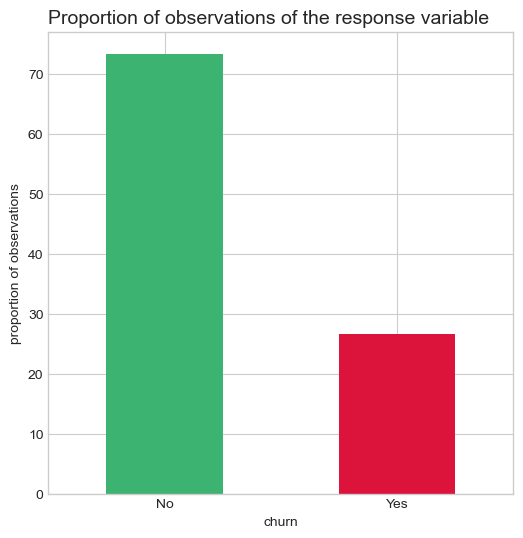

In [63]:
# create a figure - to check the imbalance of the data 
fig = plt.figure(figsize=(6, 6)) 
ax = fig.add_subplot(111)

# create a bar plot showing the percentage of churn
response_perc.plot(kind='bar', ax=ax, color=['mediumseagreen', 'crimson'])

# set title and labels
ax.set_title('Proportion of observations of the response variable', fontsize=14, loc='left')

ax.set_xlabel('churn', fontsize=10)

ax.set_ylabel('proportion of observations', fontsize=10)

ax.tick_params(rotation='auto')


Text(0.0, 1.0, 'Proportion of observations of the response variable')

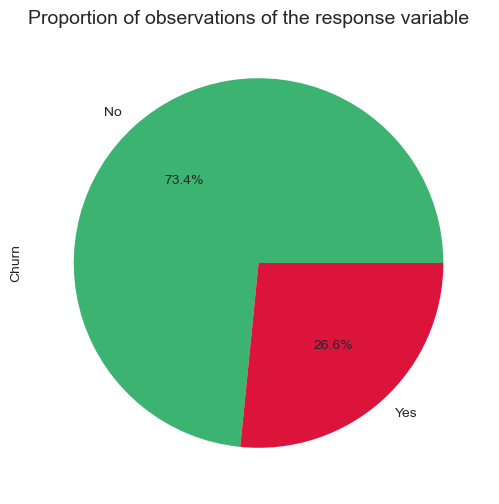

In [64]:
#same as above but pie chart 
# create a figure - to check the imbalance of the data 
fig = plt.figure(figsize=(6, 6)) 
ax = fig.add_subplot(111)

# create a pie plot showing the percentage of churn
response_perc.plot(kind='pie', ax=ax, autopct='%1.1f%%', colors=['mediumseagreen','crimson'])

# set title and labels
ax.set_title('Proportion of observations of the response variable', fontsize=14, loc='left')

#ax.tick_params(rotation='auto')

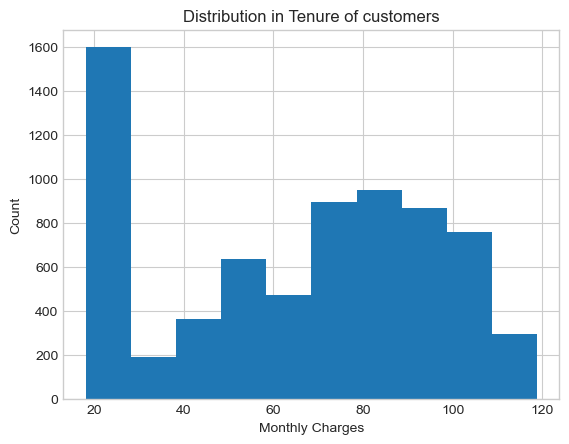

In [65]:
# Look at the distribution in tenure

tenure = df['MonthlyCharges']

plt.hist(tenure)
plt.title('Distribution in Tenure of customers')
plt.xlabel('Monthly Charges')
plt.ylabel('Count')
#plt.xticks(np.arange(0, 75, step=5))

plt.show()

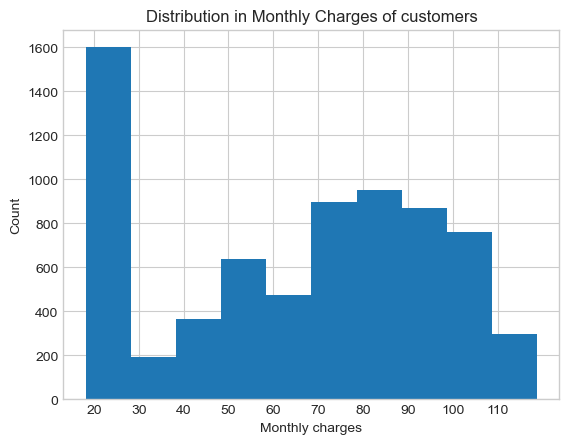

In [66]:
# Look at the distribution in monthly charges 

MonthlyCharges = df['MonthlyCharges']

plt.hist(MonthlyCharges, label = 'Monthly charges')
plt.title('Distribution in Monthly Charges of customers')
plt.xlabel('Monthly charges')
plt.ylabel('Count')
plt.xticks(np.arange(20, 120, step=10))

plt.show()

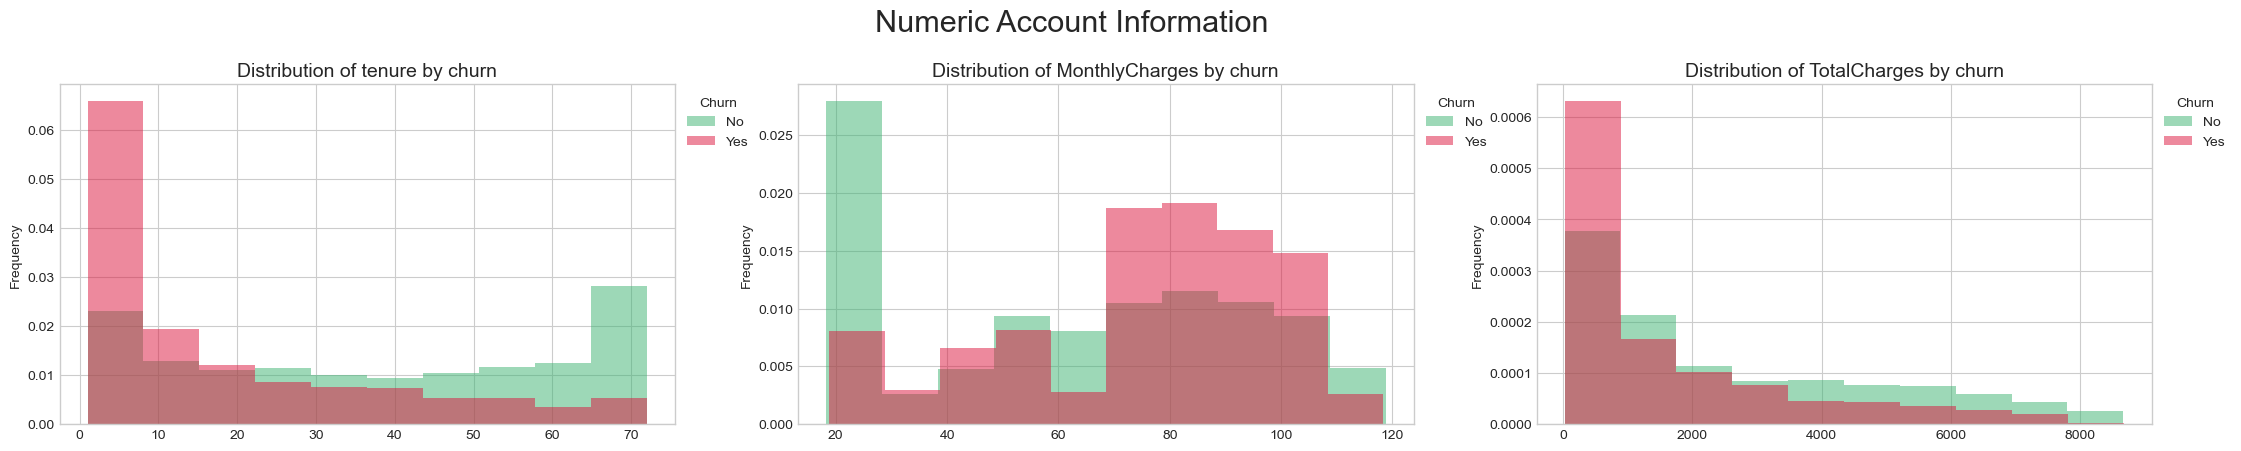

In [67]:
# Plot Numerical account information

# list of customer account column names
columns_to_plot = ['tenure', 'MonthlyCharges', 'TotalCharges']

# set number of rows and number of columns
number_of_columns = 3
number_of_rows = math.ceil(len(columns_to_plot))
super_title = 'Numeric Account Information'


# create a figure
fig = plt.figure(figsize=(27, 5 * number_of_rows)) 
fig.suptitle(super_title, fontsize=22,  y=.93)


# loop to each demographic column name to create a subplot
for index, column in enumerate(columns_to_plot, 1):

    # create the subplot
    ax = fig.add_subplot(number_of_rows, number_of_columns, index)

    # histograms for each class (normalized histogram)
    df[df['Churn']=='No'][column].plot(kind='hist', ax=ax, density=True,  alpha=0.5, color='mediumseagreen', label='No')
    df[df['Churn']=='Yes'][column].plot(kind='hist', ax=ax, density=True, alpha=0.5, color='crimson', label='Yes')

    # set the legend in the upper right corner
    ax.legend(loc="upper right", bbox_to_anchor=(0.64, 0.5, 0.5, 0.5),title='Churn', fancybox=True)

    # set title and labels
    ax.set_title('Distribution of ' + column + ' by churn',  fontsize=14, loc='center')

    ax.tick_params(rotation='auto')





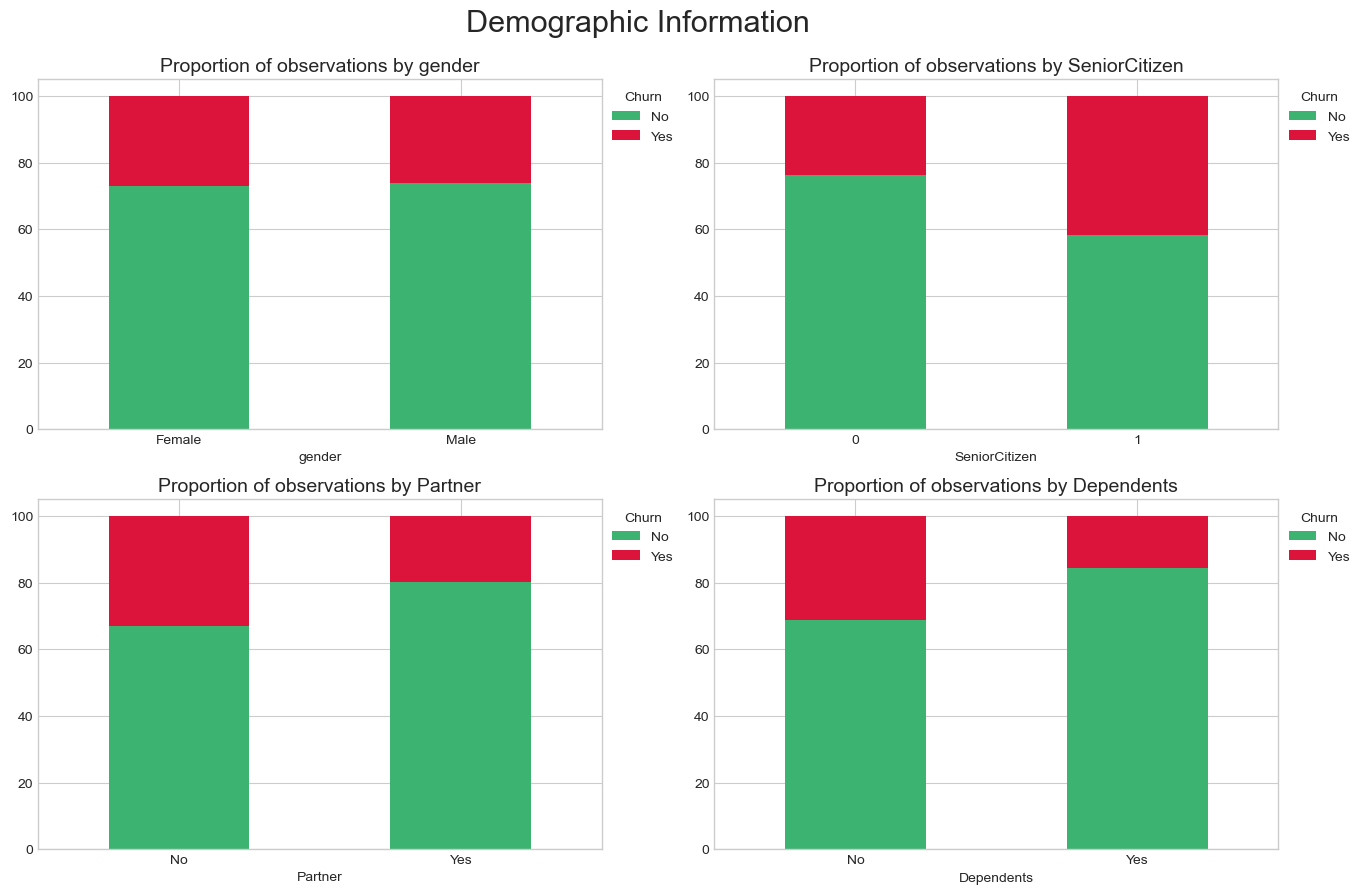

In [68]:
# Plot demographic information

columns_to_plot = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']
super_title = "Demographic Information"
number_of_columns = 2
number_of_rows = math.ceil(len(columns_to_plot)/2)

# create a figure
fig = plt.figure(figsize=(16, 5 * number_of_rows)) 
fig.suptitle(super_title, fontsize=22,  y=.95)


# loop through each column name to create a subplot
for index, column in enumerate(columns_to_plot, 1):

    # create the subplot
    ax = fig.add_subplot(number_of_rows, number_of_columns, index)

    # use a lambda funstion to calculate the percentage of observations of the response variable for each group of the independent variable
    # Create a 100% stacked bar plot
    prop_by_independent = pd.crosstab(df[column], df['Churn']).apply(lambda x: x/x.sum()*100, axis=1)

    prop_by_independent.plot(kind='bar', ax=ax, stacked=True, rot=0, color=['mediumseagreen','crimson'])

    # set the legend in the upper right corner
    ax.legend(loc="upper right", bbox_to_anchor=(0.65, 0.5, 0.5, 0.5), title='Churn')

    # set title and labels
    ax.set_title('Proportion of observations by ' + column, fontsize=14, loc='center')

    ax.tick_params(rotation='auto')



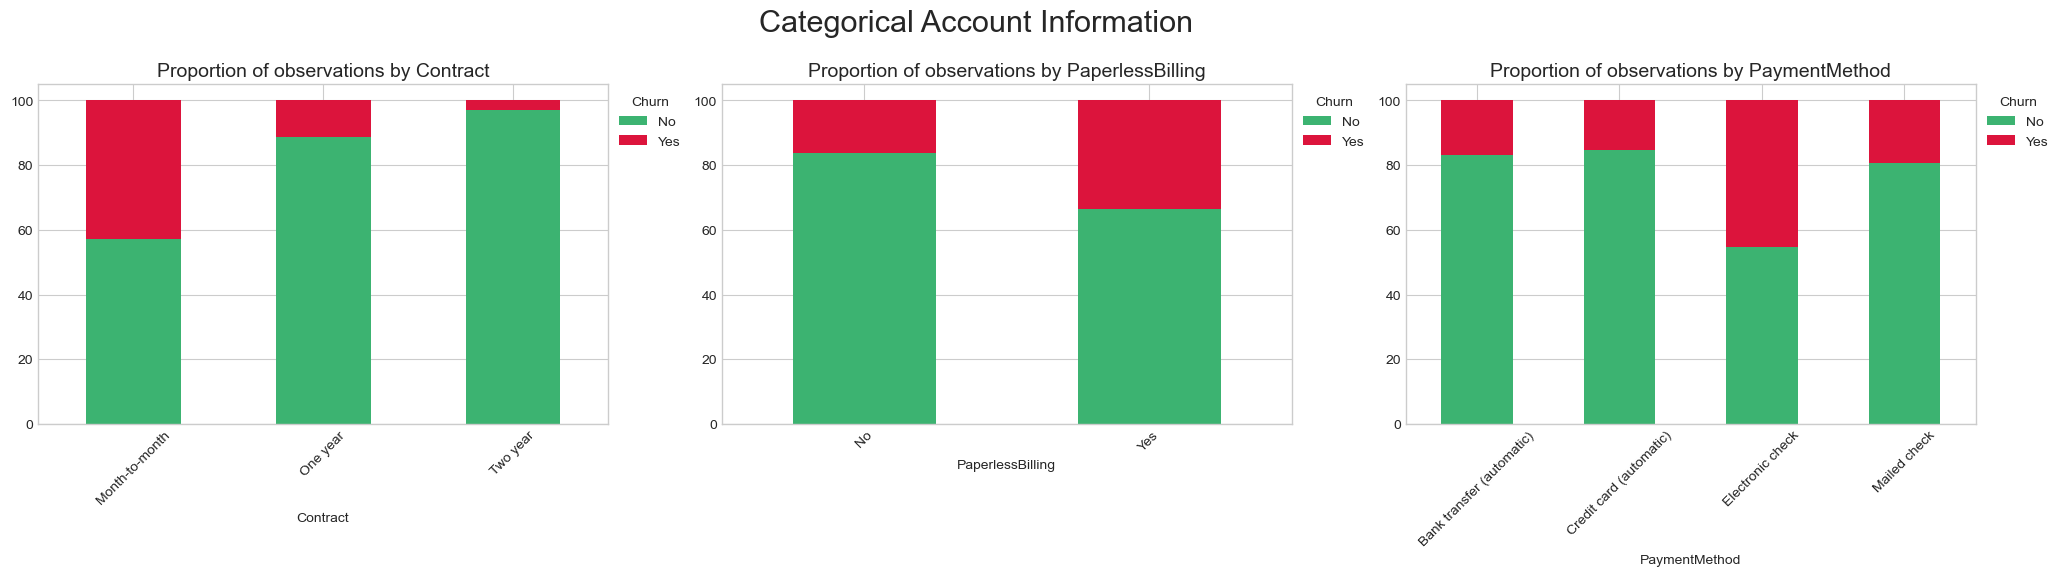

In [69]:
# Plot categorical account information

columns_to_plot = ['Contract', 'PaperlessBilling', 'PaymentMethod']
super_title = "Categorical Account Information"
number_of_columns = 3
number_of_rows = math.ceil(len(columns_to_plot))

# create a figure
fig = plt.figure(figsize=(25, 5 * number_of_rows)) 
fig.suptitle(super_title, fontsize=22,  y=.93)


# loop through each column name to create a subplot
for index, column in enumerate(columns_to_plot, 1):

    # create the subplot
    ax = fig.add_subplot(number_of_rows, number_of_columns, index)

    # use a lambda funstion to calculate the percentage of observations of the response variable for each group of the independent variable
    # Create a 100% stacked bar plot
    prop_by_independent = pd.crosstab(df[column], df['Churn']).apply(lambda x: x/x.sum()*100, axis=1)

    prop_by_independent.plot(kind='bar', ax=ax, stacked=True, rot=0, color=['mediumseagreen','crimson'])

    # set the legend in the upper right corner
    ax.legend(loc="upper right", bbox_to_anchor=(0.65, 0.5, 0.5, 0.5), title='Churn')

    # set title and labels
    ax.set_title('Proportion of observations by ' + column, fontsize=14, loc='center')

    #ax.tick_params(rotation='auto')
    ax.tick_params(axis='x', rotation=45)

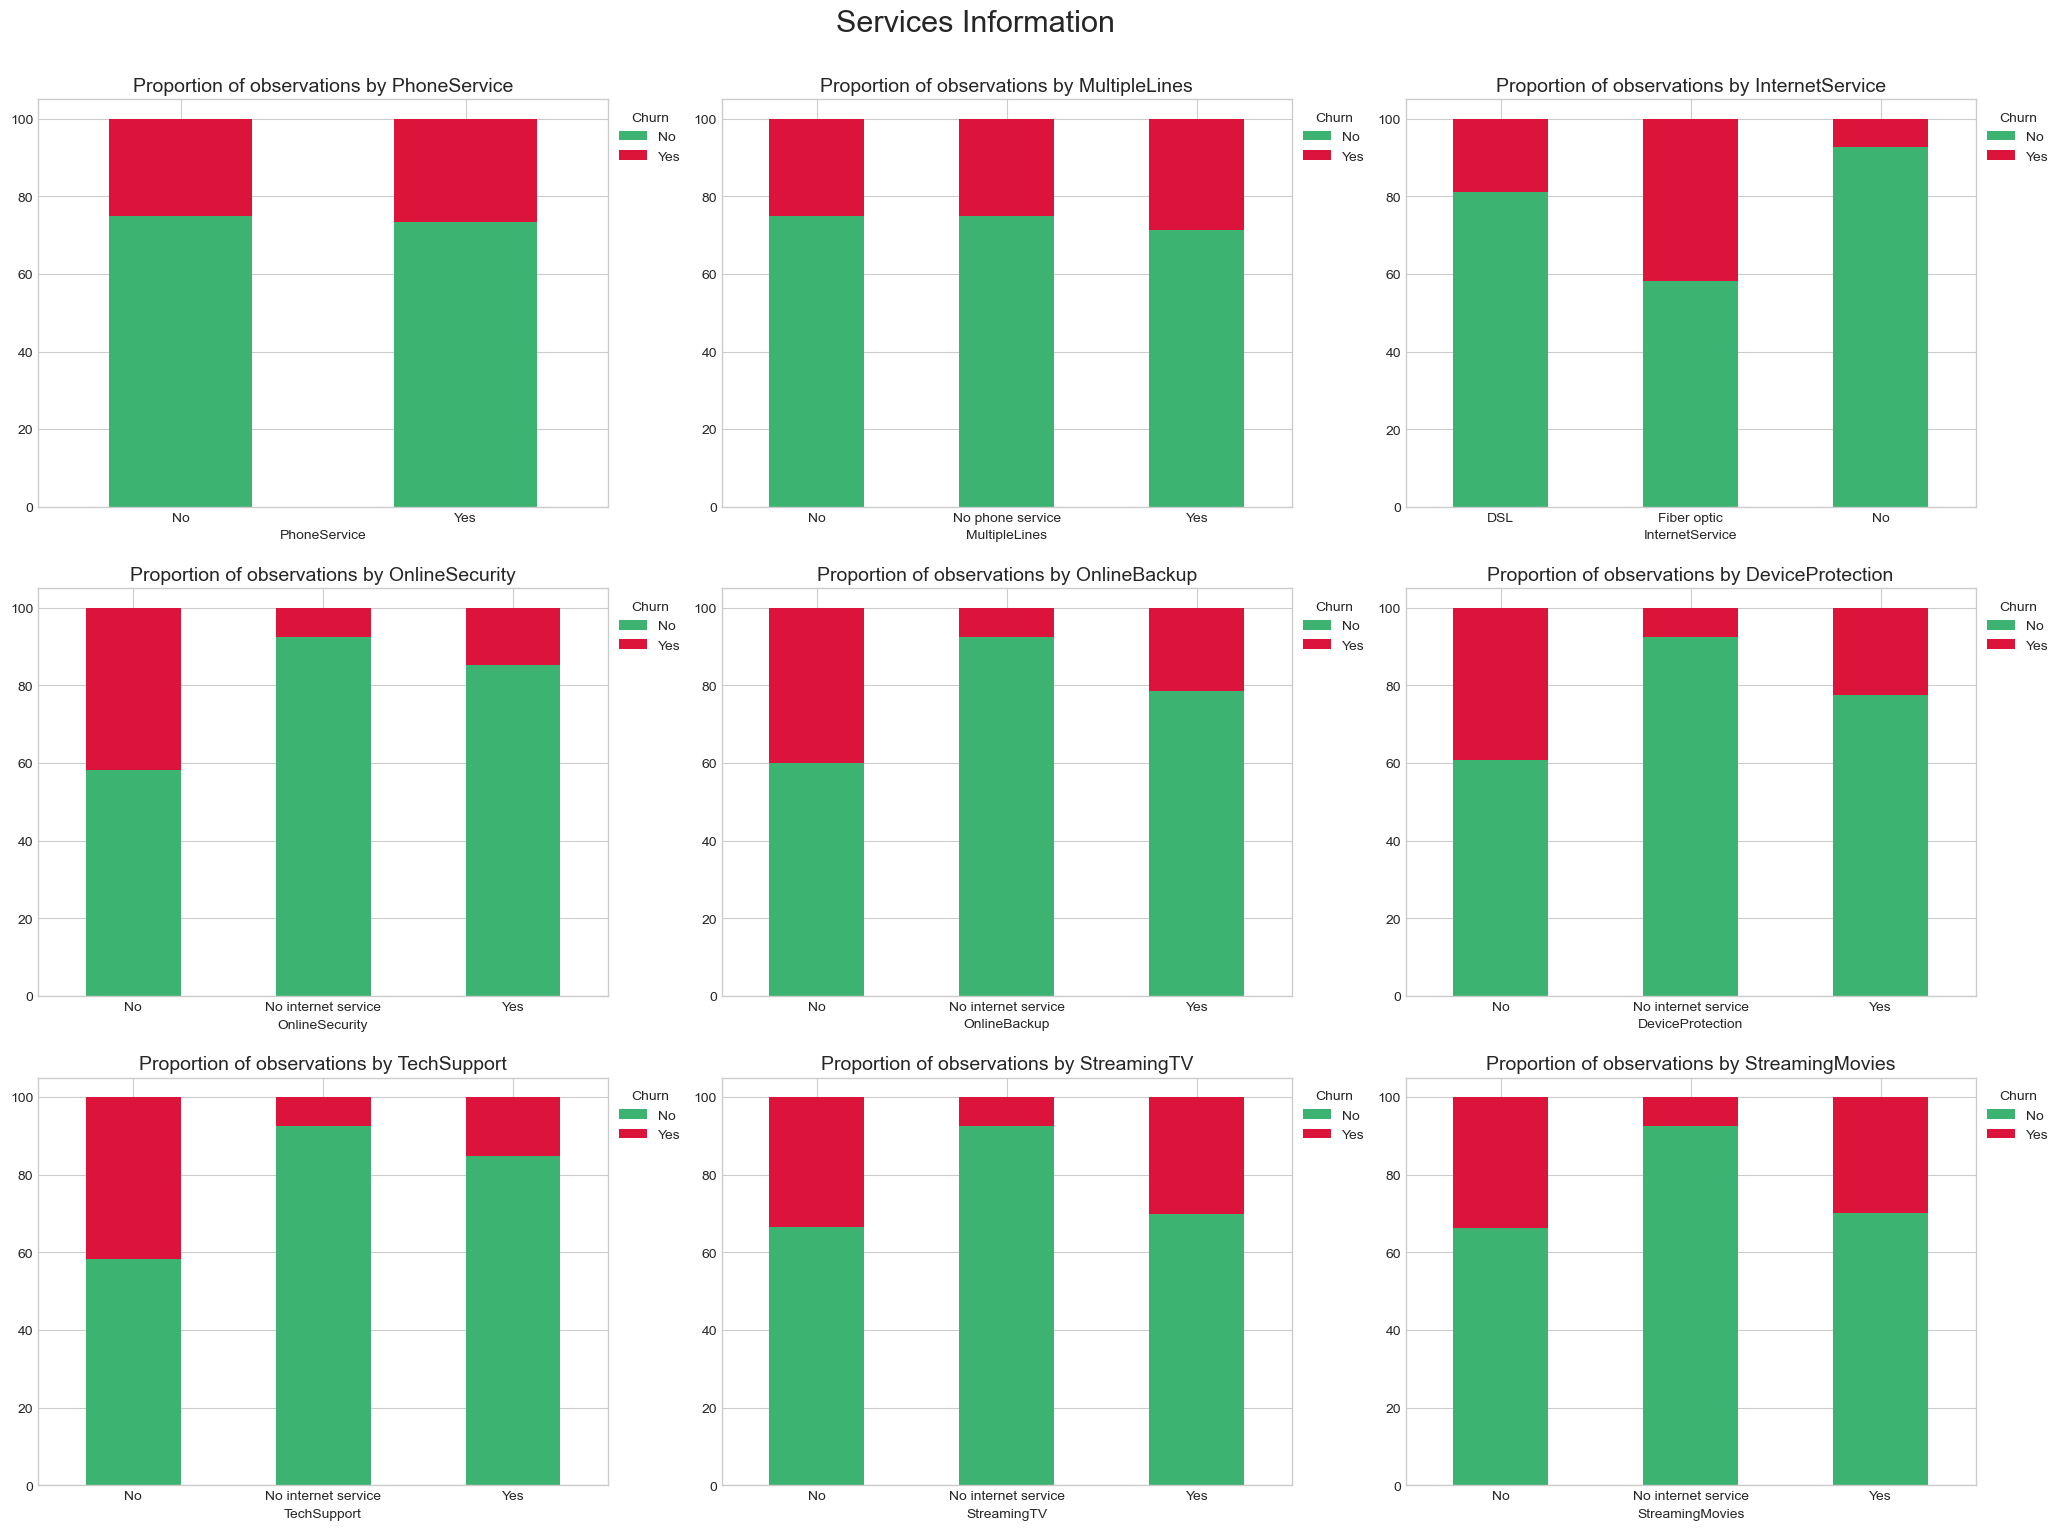

In [70]:
# Plot services information

columns_to_plot = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
super_title = "Services Information"
number_of_columns = 3
number_of_rows = math.ceil(len(columns_to_plot)/3)

# create a figure
fig = plt.figure(figsize=(25, 6 * number_of_rows)) 
fig.suptitle(super_title, fontsize=22,  y=.93)


# loop through each column name to create a subplot
for index, col in enumerate(columns_to_plot, 1):

    # create the subplot
    ax = fig.add_subplot(number_of_rows, number_of_columns, index)

    # use a lambda funstion to calculate the percentage of observations of the response variable for each group of the independent variable
    # Create a 100% stacked bar plot
    prop_by_independent = pd.crosstab(df[col], df['Churn']).apply(lambda x: x/x.sum()*100, axis=1)

    prop_by_independent.plot(kind='bar', ax=ax, stacked=True, rot=0, color=['mediumseagreen','crimson'])

    # set the legend in the upper right corner
    ax.legend(loc="upper right", bbox_to_anchor=(0.65, 0.5, 0.5, 0.5), title='Churn')

    # set title and labels
    ax.set_title('Proportion of observations by ' + col, fontsize=14, loc='center')

    ax.tick_params(rotation='auto')
    #ax.tick_params(axis='x', rotation=45)


In [71]:
# Write a function to produce the pdf plots 

def pdf_plot(column): 
    
    '''
     Prints a histogram for each independent variable of the string column.
     
            Parameters:
                    column (string): Names of the variable to plot
            Returns:
                    None
    '''


    # create a figure 
    fig = plt.figure(figsize= (10,10))

    # create the subplot
    ax = fig.add_subplot(1, 1, 1)

    sns.distplot(df[df['Churn']=='Yes'][column], label='Yes', ax=ax, color='crimson')
    sns.distplot(df[df['Churn']=='No'][column], label='No', ax=ax, color='mediumseagreen')


    # set the legend in the upper right corner
    ax.legend(loc="upper right", bbox_to_anchor=(0.5, 0.5, 0.5, 0.5), title='Churn') 
    
    ax.grid()

    # set title and labels
    ax.set_title('Distribution of ' + column + ' by churn', fontsize=16, loc='center')

    ax.tick_params(rotation='auto')

C:\Users\gleesona2\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\gleesona2\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


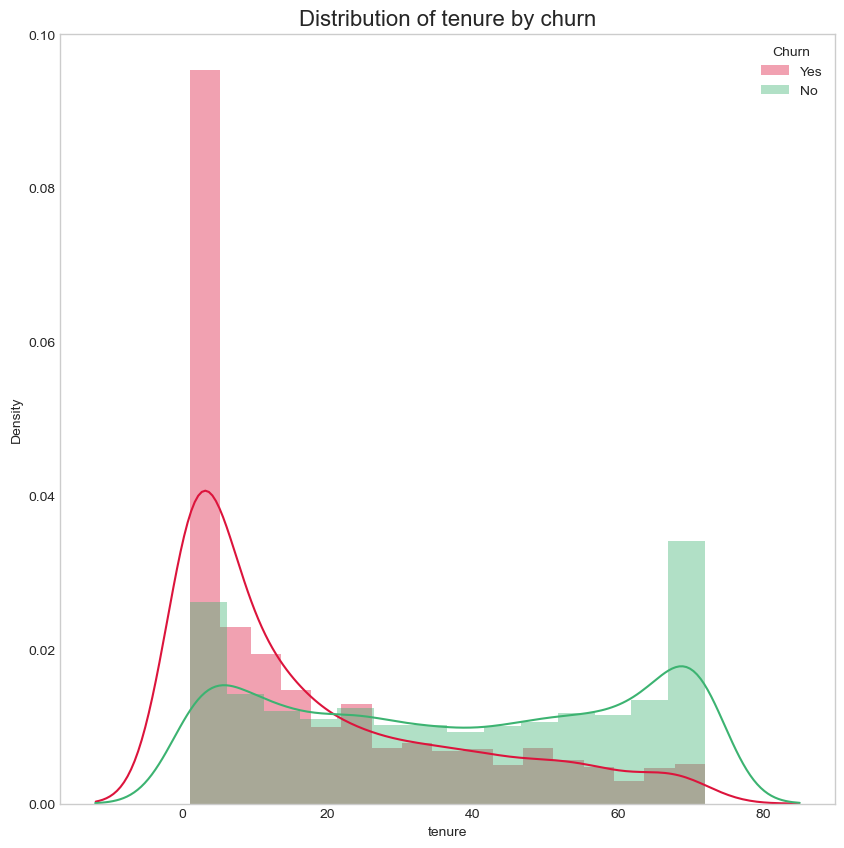

In [72]:
#Coulumn name 
column = 'tenure'
pdf_plot(column)

C:\Users\gleesona2\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\gleesona2\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


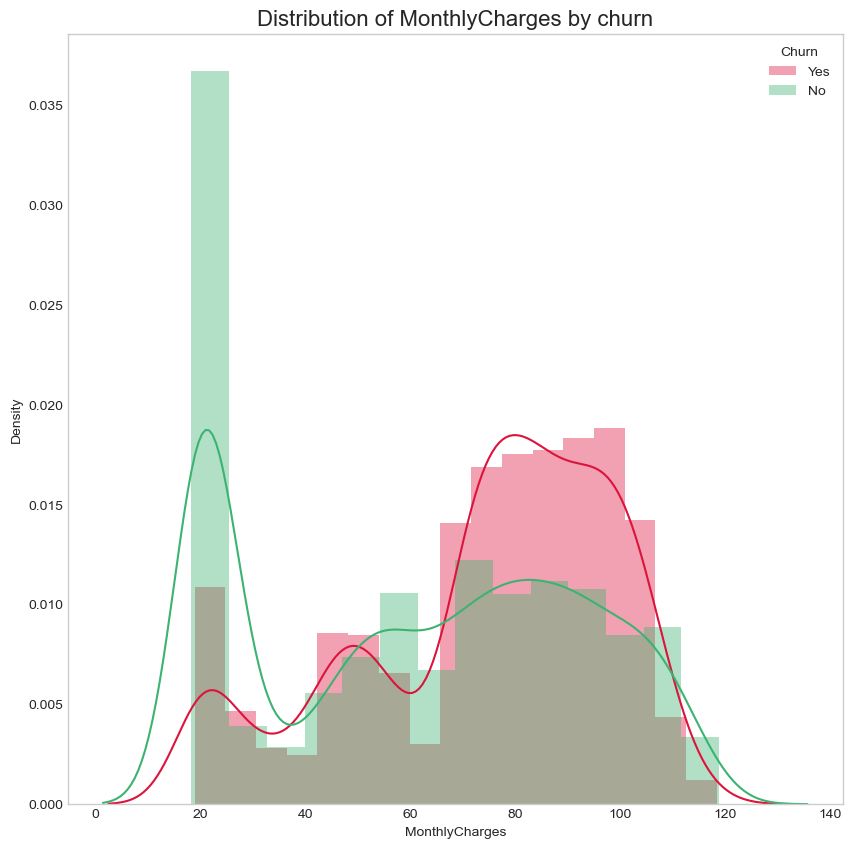

In [73]:
#Coulumn name 
column = 'MonthlyCharges'
pdf_plot(column)

C:\Users\gleesona2\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\gleesona2\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


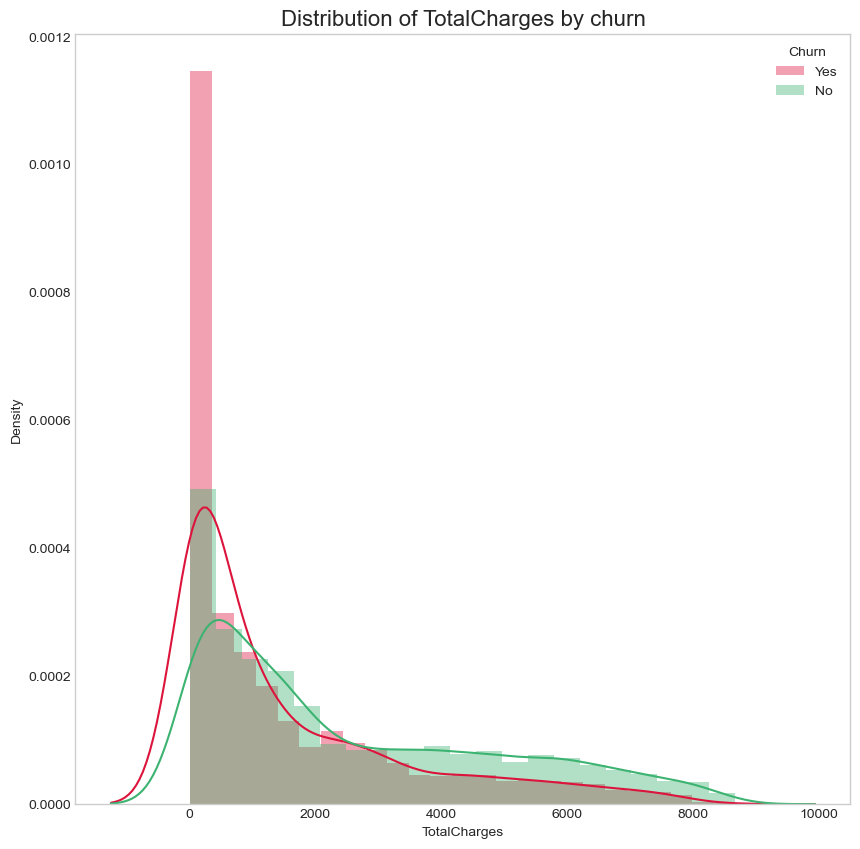

In [74]:
#Coulumn name 
column = 'TotalCharges'
pdf_plot(column)

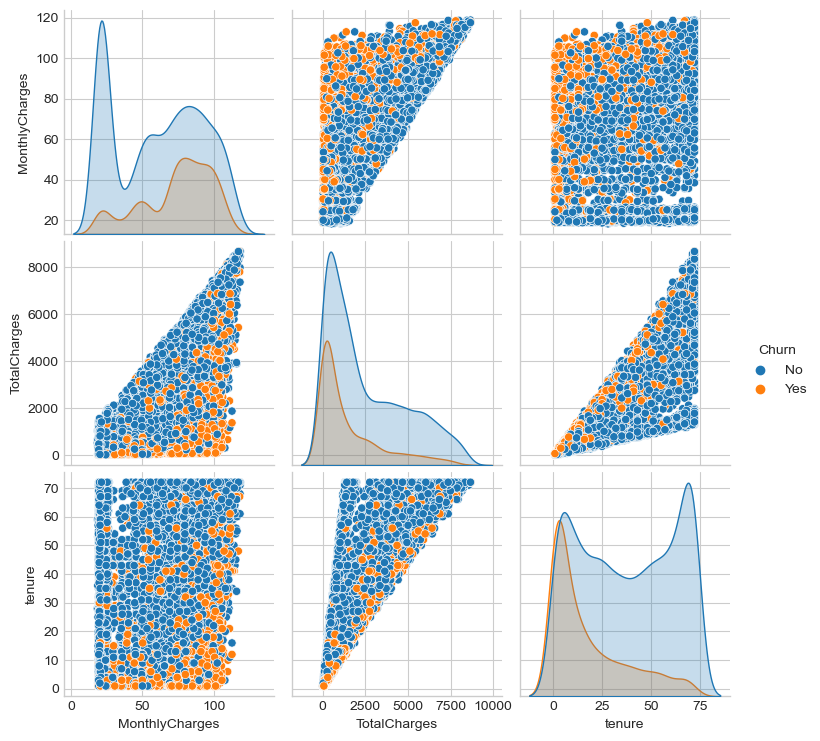

In [75]:
# Building pair plot
sns.pairplot(df,vars=['MonthlyCharges','TotalCharges','tenure'], hue='Churn')

C:\Users\gleesona2\AppData\Local\Temp\ipykernel_32368\3867328036.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<AxesSubplot:>

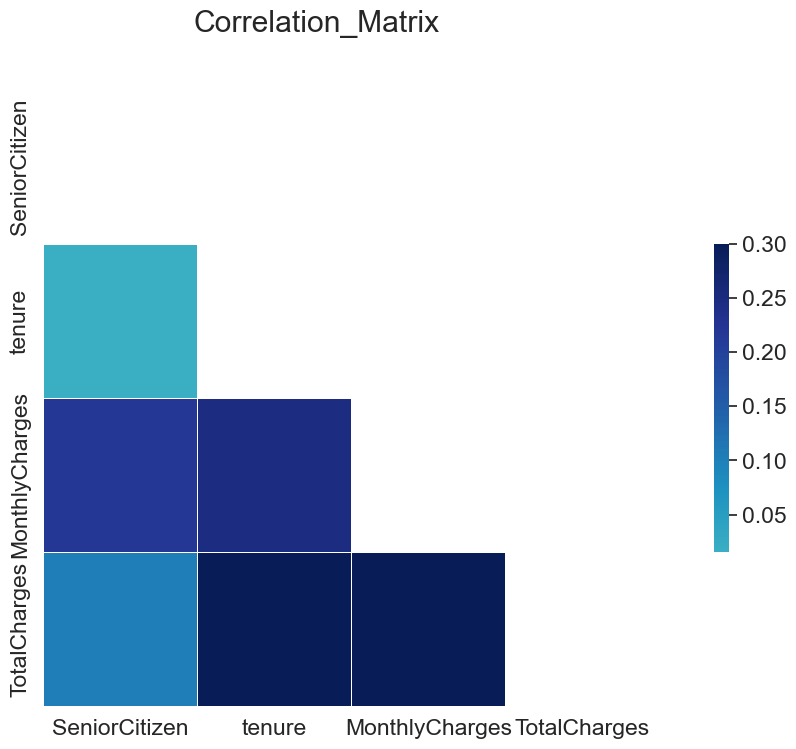

In [76]:
sns.set(style="white", font_scale =1.5)
corr = df.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f,ax = plt.subplots(figsize=(14,8))
f.suptitle('Correlation_Matrix')

#cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap='YlGnBu', vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Feature  importance 

In [77]:
# function to compute the mutual infomation score between a categorical column and churn
def compute_MI(categorical_cols):
    return mutual_info_score(categorical_cols, df.Churn)

# select categorial variables - excluding the response variable 
categorical_variables = df.select_dtypes(include=object).drop('Churn', axis=1)

# compute the mutual information score between each categorical variable and the target variable - churn
feature_importance = categorical_variables.apply(compute_MI).sort_values(ascending=False)

# print feature importance
print(feature_importance)

Contract            0.098182
OnlineSecurity      0.064528
TechSupport         0.062873
InternetService     0.055394
OnlineBackup        0.046659
PaymentMethod       0.044423
DeviceProtection    0.043784
StreamingMovies     0.031918
StreamingTV         0.031803
PaperlessBilling    0.019119
Dependents          0.014270
Partner             0.011383
MultipleLines       0.000798
PhoneService        0.000069
gender              0.000037
dtype: float64


<AxesSubplot:>

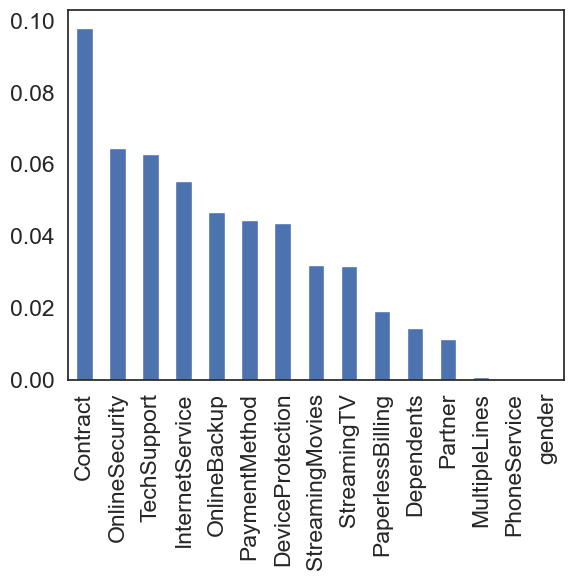

In [78]:
feature_importance.plot(kind='bar')

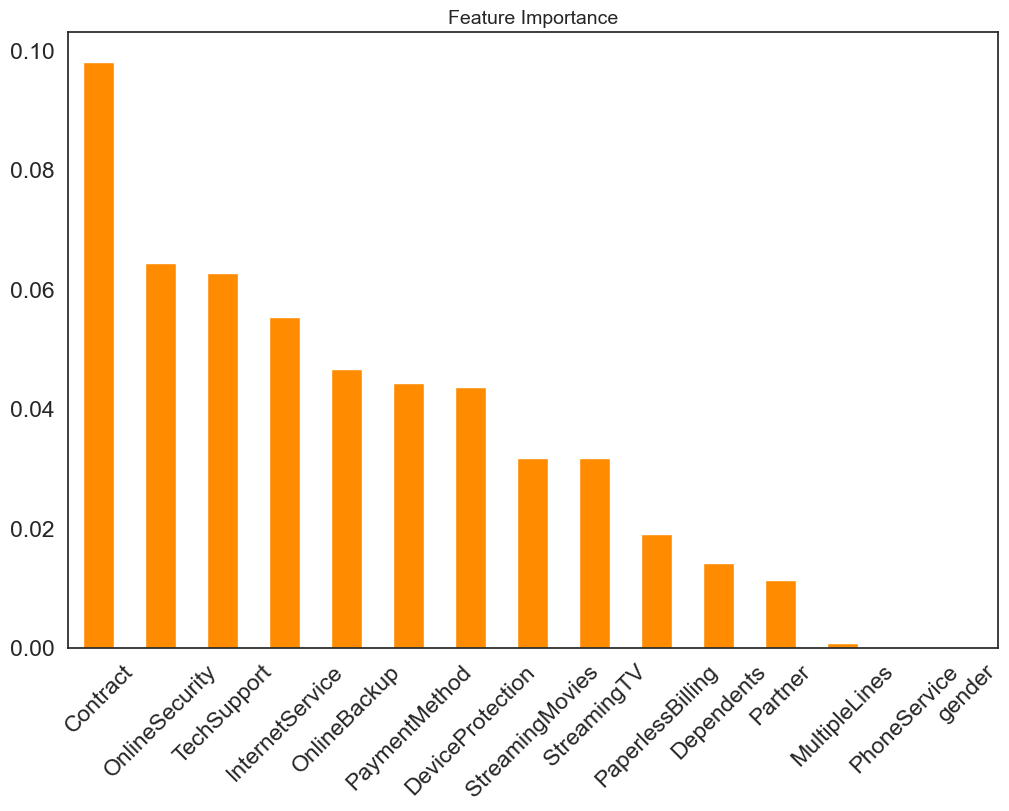

In [79]:
# create a figure
#fig = plt.figure(figsize=(8, 8)) 

# create the subplot
#ax = fig.add_subplot(1,1,1)

fig, ax = plt.subplots(figsize=(12, 8))

# calculate the percentage of observations of the response variable for each group of the independent variable

feature_importance.plot(kind='bar', ax=ax, stacked=True, rot=90, color='darkorange')
#ax.barh(feature_importance, color='darkorange')

# set title and labels
ax.set_title('Feature Importance', fontsize=14, loc='center')

#ax.tick_params(rotation='auto')
ax.tick_params(axis='x', rotation=45)

Consider dropping last 3 variables - gender, phone service and multiple lines

### Feature engineering

Need to transform data to ensure it is suitable for a machine learning model

'Yes' / 'No' values must be converted into binary values e.g. 'Yes' = 1 and 'No' = 0 

There are 6 columns where this is possible: gender, Partner, Dependents, PhoneService, PaperlessBilling and Churn

In [80]:
df_transformed = df.copy()

# label encoding (binary variables)
label_encoding_columns = ['gender', 'Partner', 'Dependents',  'PhoneService', 'PaperlessBilling', 'Churn']

# encode categorical binary features using label encoding
for column in label_encoding_columns:
    if column == 'gender':
        df_transformed[column] = df_transformed[column].map({'Female': 1, 'Male': 0})
    else: 
        df_transformed[column] = df_transformed[column].map({'Yes': 1, 'No': 0}) 

In [81]:
df_transformed.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,0,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,0,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,0,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,1,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


Need to use one-hot-encoding for non-binary categorical variables i.e. categorical variables with multiple categories. In this method a new binary column will be created at each level of the categorical variable. 

In [82]:
# one-hot encoding (categorical variables with more than two levels)
one_hot_encoding_columns = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',  'StreamingMovies', 'Contract', 'PaymentMethod']

# encode categorical variables with more than two levels using one-hot encoding
df_transformed_1= pd.get_dummies(df_transformed, columns = one_hot_encoding_columns)
df_transformed_2= pd.get_dummies(df_transformed, columns = one_hot_encoding_columns, drop_first=True)


In [83]:
df_transformed_1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,1,29.85,29.85,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,56.95,1889.50,0,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,1,53.85,108.15,1,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,1,70.70,151.65,1,...,1,0,0,1,0,0,0,0,1,0


In [84]:
df_transformed_2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,1,29.85,29.85,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,34,1,0,56.95,1889.50,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,0,0,2,1,1,53.85,108.15,1,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,0,0,1,0,0,0,0
4,1,0,0,0,2,1,1,70.70,151.65,1,...,0,0,0,0,0,0,0,0,1,0


Need to keep first column as need all categories, therefore use df_transformed_1. 

Normalization - need to normalize numeric columns so that they are all on a common scale: Tenure, Monthly Charges, Total charges.

In [85]:
# Normalization - is there a diff way to do this e.g. use whiten() 

In [86]:
df_transformed_1.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'MultipleLines_No', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMetho

In [87]:
from sklearn import preprocessing
import pandas as pd
scaler = preprocessing.MinMaxScaler()
names = df_transformed_1.columns
d = scaler.fit_transform(df_transformed_1)
scaled_df = pd.DataFrame(d, columns=names)
scaled_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1.0,0.0,1.0,0.0,0.000000,0.0,1.0,0.115423,0.001275,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.464789,1.0,0.0,0.385075,0.215867,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.014085,1.0,1.0,0.354229,0.010310,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.619718,0.0,0.0,0.239303,0.210241,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.014085,1.0,1.0,0.521891,0.015330,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


I want to only normalise my 3 numeric columns not all columns. 

In [88]:
scaled_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1.0,0.0,1.0,0.0,0.000000,0.0,1.0,0.115423,0.001275,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.464789,1.0,0.0,0.385075,0.215867,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.014085,1.0,1.0,0.354229,0.010310,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.619718,0.0,0.0,0.239303,0.210241,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.014085,1.0,1.0,0.521891,0.015330,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [89]:
#from sklearn import preprocessing

column_names_to_normalize = ['tenure', 'MonthlyCharges', 'TotalCharges']

scaler = preprocessing.MinMaxScaler()
x = df_transformed_1[column_names_to_normalize].values
x_scaled = scaler.fit_transform(x)
df_temp = pd.DataFrame(x_scaled, columns=column_names_to_normalize, index = df_transformed_1.index)
df_transformed_1[column_names_to_normalize] = df_temp

In [90]:
df_transformed_1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.000000,0,1,0.115423,0.001275,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0.464789,1,0,0.385075,0.215867,0,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0.014085,1,1,0.354229,0.010310,1,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0.619718,0,0,0.239303,0.210241,0,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,0.014085,1,1,0.521891,0.015330,1,...,1,0,0,1,0,0,0,0,1,0


In [91]:
df_transformed_1.shape

(7032, 41)

### Splitting the data into training and test sets 

In [92]:
# select independent variables
X = df_transformed_1.drop(columns='Churn')

# select dependent variables
y = df_transformed_1.loc[:, 'Churn']

# ensure the variables were correctly selected
print(X.columns)

print(y.name)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'MultipleLines_No', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit 

 It is best practice to ensure our split reflects the proportion of labels in our data. So if churn occurs in 10% of observations, we want 10% of labels in our training and test sets to represent churn. We achieve this by setting stratify equal to y.

In [93]:
# split the data in training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,  random_state=20, shuffle=True, stratify = y)

In [94]:
y_test

6655    0
3828    0
1126    1
2322    0
5681    0
       ..
3856    0
693     1
2838    0
193     0
3525    1
Name: Churn, Length: 2110, dtype: int64

### Algorithm selection

In [95]:
def create_models(seed=42):
    '''
    Create a list of machine learning models.
            Parameters:
                    seed (integer): random seed of the models
            Returns:
                    models (list): list containing the models
    '''

    models = []
    models.append(('dummy_classifier', DummyClassifier(random_state=seed, strategy='most_frequent')))
    models.append(('k_nearest_neighbors', KNeighborsClassifier()))
    models.append(('logistic_regression', LogisticRegression(random_state=seed)))
    models.append(('support_vector_machines', SVC(random_state=seed)))
    models.append(('random_forest', RandomForestClassifier(random_state=seed)))
    models.append(('gradient_boosting', GradientBoostingClassifier(random_state=seed)))
    models.append(('SVM', SVC()))
    models.append(('CART', DecisionTreeClassifier()))
    
    return models

# create a list with algorithms to be assessed
models = create_models()

In [96]:
# Print each model's accuracy using default hyperparameters
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    # fit the model with training data
    model.fit(X_train, y_train).predict(X_test)
    # make predictions with test data
    predictions = model.predict(X_test)
    # calculate accuracy 
    accuracy = accuracy_score(y_test, predictions)
    # append the model name and accuracy to the lists
    results.append(accuracy)
    names.append(name)
    # print classifier accuracy
    print('Classifier: {}, Accuracy: {})'.format(name, accuracy))

Classifier: dummy_classifier, Accuracy: 0.7341232227488151)


C:\Users\gleesona2\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\gleesona2\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set 

Classifier: k_nearest_neighbors, Accuracy: 0.7582938388625592)
Classifier: logistic_regression, Accuracy: 0.8014218009478673)
Classifier: support_vector_machines, Accuracy: 0.7990521327014218)
Classifier: random_forest, Accuracy: 0.790521327014218)
Classifier: gradient_boosting, Accuracy: 0.8071090047393364)
Classifier: SVM, Accuracy: 0.7990521327014218)
Classifier: CART, Accuracy: 0.7241706161137441)


In [97]:
gb = GradientBoostingClassifier(random_state = 42)
gb.fit(X_train, y_train) 

# make predictions with the testing data
predictions_gb = gb.predict(X_test)

# calculate accuracy 
accuracy_gb = accuracy_score(y_test, predictions_gb)    
accuracy_gb

0.8071090047393364

In [98]:
# Confusion matrix - gradient boosting default  

# construct the confusion matrix
confusion_matrix_gb = confusion_matrix(y_test, predictions_gb)

# visualize the confusion matrix
confusion_matrix_gb

array([[1390,  159],
       [ 248,  313]], dtype=int64)

In [99]:
# Find out which is true negative/positive or false negative/positive
tn, fp, fn, tp = confusion_matrix(y_test, predictions_gb).ravel()


In [100]:
(tn, fp, fn, tp)

(1390, 159, 248, 313)

In [101]:
sensitivity_default = tp/(tp+fn)
sensitivity_default

0.5579322638146168

In [102]:
specificity_default = tn/(tn+fp)
specificity_default

0.8973531310522918

In [103]:
# print classification report 
print(classification_report(y_test, predictions_gb))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1549
           1       0.66      0.56      0.61       561

    accuracy                           0.81      2110
   macro avg       0.76      0.73      0.74      2110
weighted avg       0.80      0.81      0.80      2110



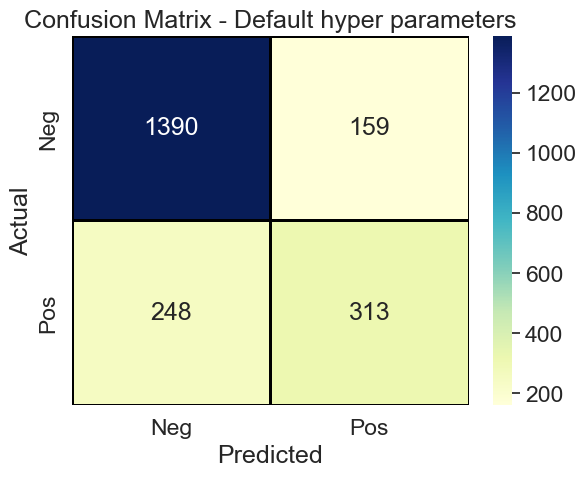

In [104]:
ax=plt.subplot();
sns.heatmap(confusion_matrix_gb, annot=True, fmt='d', linewidths=1, linecolor='black', cmap='YlGnBu',ax=ax) #YlOrRd #YlGnBu
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_ylim(2.0,0)
ax.set_title('Confusion Matrix - Default hyper parameters')
ax.xaxis.set_ticklabels(['Neg','Pos'])
ax.yaxis.set_ticklabels(['Neg','Pos'])
plt.show()

Repeat using different hyper parameters 

Need to use both random search and grid search for hyper parameter tuning, and pick which is best for your model and justify. 

### Gradient boosting 

In [105]:
# define the parameter grid
# Randomized search for gradient boosting 
grid_parameters = {'n_estimators': [80, 90, 100, 110, 115, 120],
                   'max_depth': [3, 4, 5, 6],
                   'max_features': [None, 'auto', 'sqrt', 'log2'], 
                   'min_samples_split': [2, 3, 4, 5]}

# define the RandomizedSearchCV class for trying different parameter combinations
random_search_gb = RandomizedSearchCV(estimator=GradientBoostingClassifier(),
                                   param_distributions=grid_parameters,
                                   cv=5,
                                   n_iter=150,
                                   n_jobs=-1)

# fitting the model for random search 
random_search_gb.fit(X_train, y_train)

# print best parameter after tuning
print("Tuned gradient boosting parameters: {}". format(random_search_gb.best_params_))
print("Tuned gradient boosting score: {}". format(random_search_gb.best_score_))

Tuned gradient boosting parameters: {'n_estimators': 110, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 4}
Tuned gradient boosting score: 0.8080021460113078


In [106]:
# define the parameter grid
# Randomized search for gradient boosting (different grid parameter) 

grid_parameters_2 = {'n_estimators': [70, 80, 90, 100, 110],
                   'max_depth': [2, 3, 4, 5],
                   'max_features': [None, 'auto', 'sqrt', 'log2'], 
                   'min_samples_split': [2, 3, 4, 5]} # used a dictionary as it is unordered and quicker 


# define the RandomizedSearchCV class for trying different parameter combinations
random_search_gb_2 = RandomizedSearchCV(estimator=GradientBoostingClassifier(),
                                   param_distributions=grid_parameters_2,
                                   cv=5,
                                   n_iter=150,
                                   n_jobs=-1)

# fitting the model for random search 
random_search_gb_2.fit(X_train, y_train)

# print best parameter after tuning
print("Tuned gradient boosting parameters: {}". format(random_search_gb_2.best_params_))
print("Tuned gradient boosting score: {}". format(random_search_gb_2.best_score_))

Tuned gradient boosting parameters: {'n_estimators': 70, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 3}
Tuned gradient boosting score: 0.8080029714002723


The default parameters for gradient boosting are: 
    'n_estimators': 100
    'max_depth': 3
    'max_features': None
    'min_samples_split': 2

In [107]:
#GradientBoostingClassifier().get_params().keys()

#### Model performance - Gradient Boosting - Random search

In [108]:
# Confusion matrix - random search 

# make the predictions
random_search_predictions_gb = random_search_gb.predict(X_test)

# construct the confusion matrix
confusion_matrix_rs_gb = confusion_matrix(y_test, random_search_predictions_gb)

# visualize the confusion matrix
confusion_matrix_rs_gb

array([[1376,  173],
       [ 253,  308]], dtype=int64)

In [109]:
# Confusion matrix - random search 

# make the predictions
random_search_predictions_gb_2 = random_search_gb_2.predict(X_test)

# construct the confusion matrix
confusion_matrix_rs_gb_2 = confusion_matrix(y_test, random_search_predictions_gb_2)

# visualize the confusion matrix
confusion_matrix_rs_gb_2

array([[1384,  165],
       [ 253,  308]], dtype=int64)

In [110]:
# Find out which is true negative/positive or false negative/positive
tn_2, fp_2, fn_2, tp_2 = confusion_matrix(y_test, random_search_predictions_gb_2).ravel()


In [111]:
(tn_2, fp_2, fn_2, tp_2)

(1384, 165, 253, 308)

In [112]:
sensitivity_tuned = tp_2/(tp_2+fn_2)
sensitivity_tuned

0.5490196078431373

In [113]:
specificity_tuned = tn_2/(tn_2+fp_2)
specificity_tuned

0.8934796642995481

In [114]:
# print classification report 
print(classification_report(y_test, random_search_predictions_gb))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1549
           1       0.64      0.55      0.59       561

    accuracy                           0.80      2110
   macro avg       0.74      0.72      0.73      2110
weighted avg       0.79      0.80      0.79      2110



In [115]:
# print classification report 
print(classification_report(y_test, random_search_predictions_gb_2))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1549
           1       0.65      0.55      0.60       561

    accuracy                           0.80      2110
   macro avg       0.75      0.72      0.73      2110
weighted avg       0.79      0.80      0.80      2110



In [116]:
# print the accuracy of the model
accuracy_score(y_test, random_search_predictions_gb)

0.7981042654028436

In [117]:
# print the accuracy of the model
accuracy_score(y_test, random_search_predictions_gb_2)

0.8018957345971564

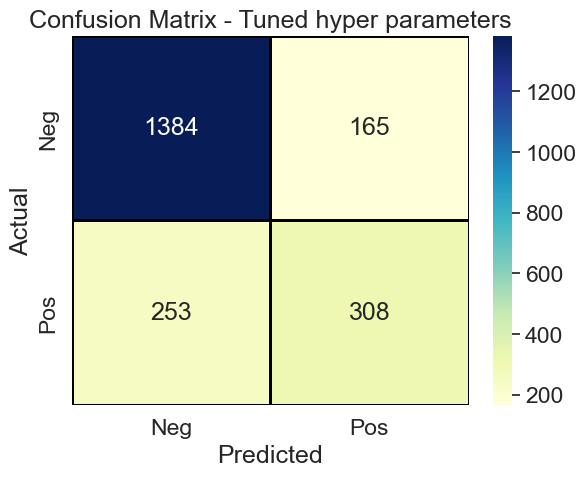

In [118]:
ax=plt.subplot();
sns.heatmap(confusion_matrix_rs_gb_2, annot=True, fmt='d', linewidths=1, linecolor='black', cmap='YlGnBu',ax=ax) #YlOrRd #YlGnBu
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_ylim(2.0,0)
ax.set_title('Confusion Matrix - Tuned hyper parameters')
ax.xaxis.set_ticklabels(['Neg','Pos'])
ax.yaxis.set_ticklabels(['Neg','Pos'])
plt.show()

#### Model performance - Gradient Boosting - Grid search

In [590]:
# Grid search CV gradient boosting 

kf=KFold(n_splits=5, shuffle=True, random_state=42)

#Set up the parameter grid 
#param_grid={"alpha": np.linspace(0.0001, 1, 20)}

param_grid = {'n_estimators': [80, 90, 100, 110, 115, 120],
                   'max_depth': [3, 4, 5, 6],
                   'max_features': [None, 'auto', 'sqrt', 'log2'], 
                   'min_samples_split': [2, 3, 4, 5]}

gradient_boosting=GradientBoostingClassifier()

# Instaniate gradient_boosting_cv
gradient_boosting_cv = GridSearchCV(gradient_boosting , param_grid, cv=kf)

# Fit to the training data 
gradient_boosting_cv.fit(X_train, y_train) 
print("Tuned gradient boosting parameters: {}". format(gradient_boosting_cv.best_params_))
print("Tuned gradient boosting score: {}". format(gradient_boosting_cv.best_score_))

Tuned gradient boosting parameters: {'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 3, 'n_estimators': 120}
Tuned gradient boosting score: 0.8055668358714044


In [591]:
# Grid search CV gradient boosting 

kf=KFold(n_splits=5, shuffle=True, random_state=42)

#Set up the parameter grid 
#param_grid={"alpha": np.linspace(0.0001, 1, 20)}

param_grid_2 = {'n_estimators': [70, 80, 90, 100, 110],
                   'max_depth': [2, 3, 4, 5],
                   'max_features': [None, 'auto', 'sqrt', 'log2'], 
                   'min_samples_split': [2, 3, 4, 5]}

gradient_boosting=GradientBoostingClassifier()

# Instaniate gradient_boosting_cv
gradient_boosting_cv_2 = GridSearchCV(gradient_boosting , param_grid_2, cv=kf)

# Fit to the training data 
gradient_boosting_cv_2.fit(X_train, y_train) 
print("Tuned gradient boosting parameters: {}". format(gradient_boosting_cv_2.best_params_))
print("Tuned gradient boosting score: {}". format(gradient_boosting_cv_2.best_score_))

Tuned gradient boosting parameters: {'max_depth': 3, 'max_features': 'log2', 'min_samples_split': 4, 'n_estimators': 110}
Tuned gradient boosting score: 0.8059739589781685


In [592]:
# Confusion matrix - grid search 

# make the predictions
grid_search_predictions_gb = gradient_boosting_cv.predict(X_test)

# construct the confusion matrix
confusion_matrix_gs_gb = confusion_matrix(y_test, grid_search_predictions_gb)

# visualize the confusion matrix
confusion_matrix_gs_gb

array([[1380,  169],
       [ 258,  303]], dtype=int64)

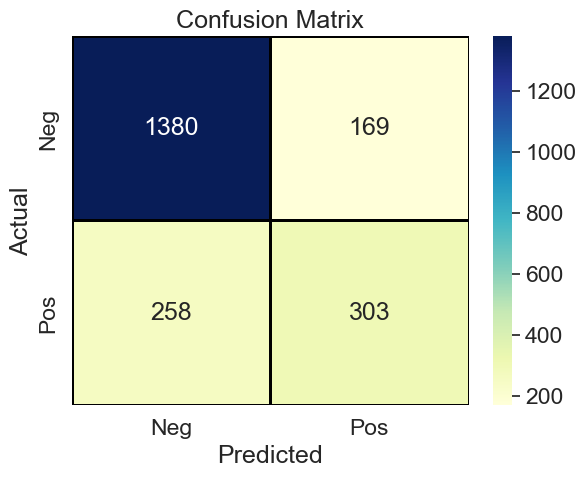

In [593]:
ax=plt.subplot();
sns.heatmap(confusion_matrix_gs_gb, annot=True, fmt='d', linewidths=1, linecolor='black', cmap='YlGnBu',ax=ax) #YlOrRd #YlGnBu
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_ylim(2.0,0)
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Neg','Pos'])
ax.yaxis.set_ticklabels(['Neg','Pos'])
plt.show()

In [594]:
# Confusion matrix - grid search 

# make the predictions
grid_search_predictions_gb_2 = gradient_boosting_cv_2.predict(X_test)

# construct the confusion matrix
confusion_matrix_gs_gb_2 = confusion_matrix(y_test, grid_search_predictions_gb_2)

# visualize the confusion matrix
confusion_matrix_gs_gb_2

array([[1392,  157],
       [ 260,  301]], dtype=int64)

In [595]:
# print classification report 
print(classification_report(y_test, grid_search_predictions_gb))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1549
           1       0.64      0.54      0.59       561

    accuracy                           0.80      2110
   macro avg       0.74      0.72      0.73      2110
weighted avg       0.79      0.80      0.79      2110



In [596]:
# print classification report 
print(classification_report(y_test, grid_search_predictions_gb_2))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1549
           1       0.66      0.54      0.59       561

    accuracy                           0.80      2110
   macro avg       0.75      0.72      0.73      2110
weighted avg       0.79      0.80      0.80      2110



In [597]:
# print the accuracy of the model
accuracy_score(y_test, grid_search_predictions_gb)

0.7976303317535545

In [598]:
# print the accuracy of the model
accuracy_score(y_test, grid_search_predictions_gb_2)

0.8023696682464455

### Logistic Regression

In [599]:
LogisticRegression().get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [600]:
# define the parameter grid - logistic regression 

grid_parameters = {'penalty': ["none", "l2"],
                   'tol': np.linspace(0.0001, 1.0, 50),
                   'C': np.linspace(0.0001, 1.0, 50), 
                   'class_weight': ["balanced", {0:0.8, 1:0.2}]}


# define the RandomizedSearchCV class for trying different parameter combinations
random_search_lr = RandomizedSearchCV(estimator=LogisticRegression(),
                                   param_distributions=grid_parameters,
                                   cv=5, #cv=kf
                                   n_iter=150,
                                   n_jobs=-1)

# fitting the model for random search 
random_search_lr.fit(X_train, y_train)

# print best parameter after tuning
print(random_search.best_params_)
print("Tuned Logistic Regression parameters: {}". format(random_search_lr.best_params_))
print("Tuned Logistic Regression score: {}". format(random_search_lr.best_score_))

{'tol': 0.5918775510204082, 'penalty': 'l2', 'class_weight': 'balanced', 'C': 0.2836734693877551}
Tuned Logistic Regression parameters: {'tol': 0.551065306122449, 'penalty': 'l2', 'class_weight': 'balanced', 'C': 0.28578571428571425}
Tuned Logistic Regression score: 0.7494930048285254


In [601]:
# define the parameter grid - logistic regression 

grid_parameters_2 = {'penalty': ["none", "l2"],
                   'tol': np.linspace(0.00001, 0.0001, 1),
                   'C': np.linspace(0.0001, 1.0, 50), 
                   'class_weight': ["balanced", {0:0.8, 1:0.2}]}


# define the RandomizedSearchCV class for trying different parameter combinations
random_search_lr_2 = RandomizedSearchCV(estimator=LogisticRegression(),
                                   param_distributions=grid_parameters_2,
                                   cv=5, #cv=kf
                                   n_iter=150,
                                   n_jobs=-1)

# fitting the model for random search 
random_search_lr_2.fit(X_train, y_train)

# print best parameter after tuning
print(random_search.best_params_)
print("Tuned Logistic Regression parameters: {}". format(random_search_lr_2.best_params_))
print("Tuned Logistic Regression score: {}". format(random_search_lr_2.best_score_))

{'tol': 0.5918775510204082, 'penalty': 'l2', 'class_weight': 'balanced', 'C': 0.2836734693877551}
Tuned Logistic Regression parameters: {'tol': 1e-05, 'penalty': 'l2', 'class_weight': 'balanced', 'C': 0.30619183673469386}
Tuned Logistic Regression score: 0.7494930048285254


The default parameters for logistic regression are: 
        'penalty': "l2"
        'tol': 0.0001
        'C': 1.0
        'class_weight': None

#### Model performance - Logistic Regression - Random search

In [603]:
# Confusion matrix - random search 

# make the predictions
random_search_predictions_lr = random_search_lr.predict(X_test)

# construct the confusion matrix
confusion_matrix_rs_lr = confusion_matrix(y_test, random_search_predictions_lr)

# visualize the confusion matrix
confusion_matrix_rs_lr

array([[1122,  427],
       [ 111,  450]], dtype=int64)

In [604]:
# Confusion matrix - random search 

# make the predictions
random_search_predictions_lr_2 = random_search_lr_2.predict(X_test)

# construct the confusion matrix
confusion_matrix_rs_lr_2 = confusion_matrix(y_test, random_search_predictions_lr_2)

# visualize the confusion matrix
confusion_matrix_rs_lr_2

array([[1123,  426],
       [ 111,  450]], dtype=int64)

There is 1,121 true negatives and 450 true positives = 1,571 observations correctly classified. 
There is 111 + 428 = 539 incorrect classifications 


In [605]:
# print classification report 
print(classification_report(y_test, random_search_predictions_lr))

              precision    recall  f1-score   support

           0       0.91      0.72      0.81      1549
           1       0.51      0.80      0.63       561

    accuracy                           0.75      2110
   macro avg       0.71      0.76      0.72      2110
weighted avg       0.80      0.75      0.76      2110



In [606]:
# print classification report 
print(classification_report(y_test, random_search_predictions_lr_2))

              precision    recall  f1-score   support

           0       0.91      0.72      0.81      1549
           1       0.51      0.80      0.63       561

    accuracy                           0.75      2110
   macro avg       0.71      0.76      0.72      2110
weighted avg       0.80      0.75      0.76      2110



In [607]:
# print the accuracy of the model
accuracy_score(y_test, random_search_predictions_lr)

0.7450236966824645

In [608]:
# print the accuracy of the model
accuracy_score(y_test, random_search_predictions_lr_2)

0.7454976303317535

#### Model performance - Logistic Regression - Grid search

In [609]:
#estimator.get_params().keys()

In [610]:
# Grid search CV for log_reg 

#kf=KFold(n_splits=5, shuffle=True, random_state=42)

#Set up the parameter grid 
#param_grid={"alpha": np.linspace(0.0001, 1, 20)}

grid_parameters = {#'penalty': ["none", "l2"],
                   'penalty': ['l1', 'l2'],
                   'tol': np.linspace(0.0001, 1.0, 50),
                   'C': np.linspace(0.1, 1.0, 50), 
                   #'C': np.logspace(-4, 4, 20) #,
                   'class_weight': ["balanced", {0:0.8, 1:0.2}]
                   }

#logreg=LogisticRegression(solver='lbfgs', max_iter=10000) # Need to increase max iterations (100 is the default) to get achieve convergence 
logreg=LogisticRegression(solver='liblinear', max_iter=10000) # 

# Instaniate gradient_boosting_cv
logreg_cv = GridSearchCV(logreg , grid_parameters, cv=5)

# Fit to the training data 
logreg_cv.fit(X_train, y_train) 
#print("Tuned gradient boosting parameters: {}". format(logreg_cv.best_params_))
#print("Tuned gradient boosting scpre: {}". format(logreg_cv.best_score_))

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=10000, solver='liblinear'),
             param_grid={'C': array([0.1       , 0.11836735, 0.13673469, 0.15510204, 0.17346939,
       0.19183673, 0.21020408, 0.22857143, 0.24693878, 0.26530612,
       0.28367347, 0.30204082, 0.32040816, 0.33877551, 0.35714286,
       0.3755102 , 0.39387755, 0.4122449 , 0.43061224, 0.44897959,
       0.46734694, 0.48571429, 0.50408163, 0...
       4.89846939e-01, 5.10253061e-01, 5.30659184e-01, 5.51065306e-01,
       5.71471429e-01, 5.91877551e-01, 6.12283673e-01, 6.32689796e-01,
       6.53095918e-01, 6.73502041e-01, 6.93908163e-01, 7.14314286e-01,
       7.34720408e-01, 7.55126531e-01, 7.75532653e-01, 7.95938776e-01,
       8.16344898e-01, 8.36751020e-01, 8.57157143e-01, 8.77563265e-01,
       8.97969388e-01, 9.18375510e-01, 9.38781633e-01, 9.59187755e-01,
       9.79593878e-01, 1.00000000e+00])})

In [611]:
grid_parameters_2 = {'penalty': ["none", "l2"],
                   'tol': np.linspace(0.00001, 0.0001, 1),
                   'C': np.linspace(0.0001, 1.0, 50), 
                   'class_weight': ["balanced", {0:0.8, 1:0.2}]}

In [612]:
# Confusion matrix - grid search

# make the predictions
grid_search_predictions_lr = logreg_cv.predict(X_test)

# construct the confusion matrix
confusion_matrix_gs_lr = confusion_matrix(y_test, grid_search_predictions_lr)

# visualize the confusion matrix
confusion_matrix_gs_lr

array([[1110,  439],
       [ 119,  442]], dtype=int64)

In [613]:
# print classification report 
print(classification_report(y_test, grid_search_predictions_lr))

              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1549
           1       0.50      0.79      0.61       561

    accuracy                           0.74      2110
   macro avg       0.70      0.75      0.71      2110
weighted avg       0.80      0.74      0.75      2110



In [614]:
# print the accuracy of the model
accuracy_score(y_test, grid_search_predictions_lr)

0.7355450236966825

#### ROC AUC

In [615]:
def y_pred_probs_models(model):
    
    y_pred_probs=model.predict_proba(X_test)[:,1]
    return y_pred_probs

In [616]:
print(y_pred_probs)

[0.01536945 0.01636759 0.43034217 ... 0.01530231 0.03033732 0.4172943 ]


In [617]:
y_pred_probs_models(random_search_gb)


array([0.01143119, 0.01356882, 0.38438643, ..., 0.01299148, 0.02558234,
       0.45147496])

In [618]:
def roc_curve_model(model, title):
    y_pred_probs=model.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
    plt.plot([0,1],[0,1], 'k--')
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title + ' - ROC Curve')
    plt.grid( linestyle='-', linewidth=1)
    plt.show()
    print("The roc_auc score is: {}".format(roc_auc_score(y_test, y_pred_probs)))


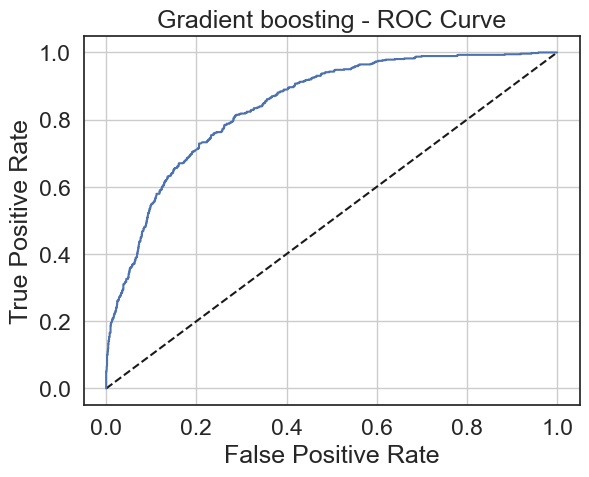

The roc_auc score is: 0.8433806411818792


In [619]:
roc_curve_model(random_search_gb, "Gradient boosting")

In [620]:
y_pred_probs_models(random_search_gb_2)

array([0.01350282, 0.01358883, 0.33983767, ..., 0.01178021, 0.03300753,
       0.45317759])

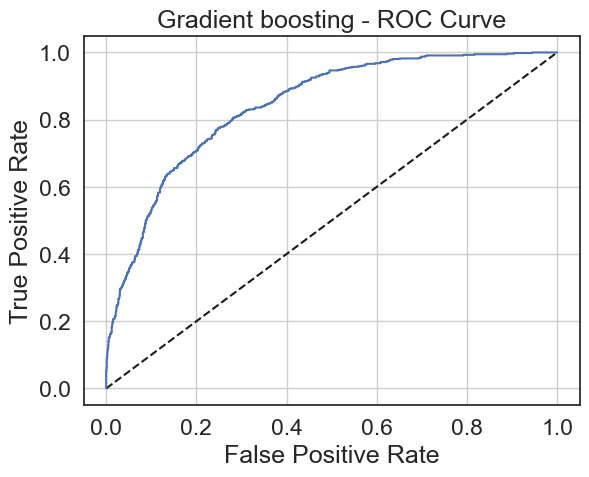

The roc_auc score is: 0.8429813265760556


In [621]:
roc_curve_model(random_search_gb_2, "Gradient boosting")

In [622]:
y_pred_probs_models(gb)

array([0.01782558, 0.01810108, 0.37592432, ..., 0.01826951, 0.01677126,
       0.47318595])

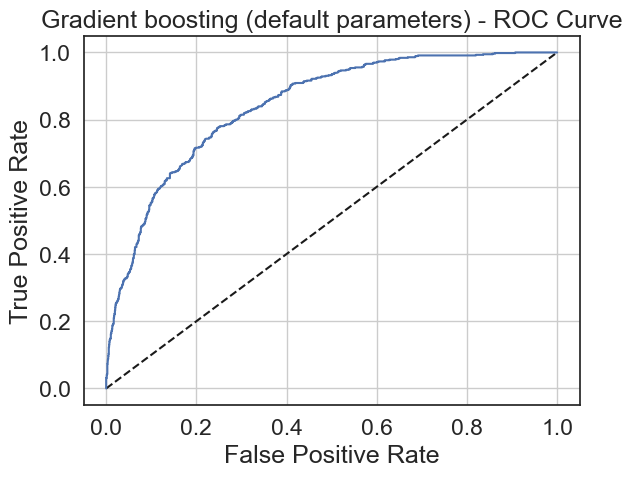

The roc_auc score is: 0.8437465836736714


In [623]:
roc_curve_model(gb, "Gradient boosting (default parameters)")

0.84, The higher the AUC the better the model's performance at distinguishing between the positive and negative classes. An AUC score between 0.8 to 0.9 is considered excellent.

In [624]:
y_pred_probs_models(random_search_lr_2)

array([0.02212936, 0.01861092, 0.70086648, ..., 0.03828731, 0.0936557 ,
       0.71675431])

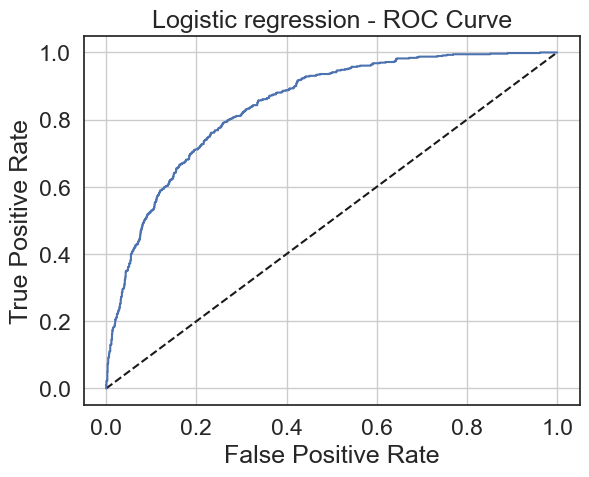

The roc_auc score is: 0.8438984843306419


In [625]:
roc_curve_model(random_search_lr_2, "Logistic regression")

In [626]:
random_search_predictions_gb_2 , random_search_predictions_gb, random_search_predictions_lr_2

(array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 1, ..., 0, 0, 1], dtype=int64))

In [627]:
y_pred_probs=random_search_gb.predict_proba(X_test)[:,1]
print(y_pred_probs[0])

0.011431193240598854


The model predicts a probability of 0.07 that the first observation has churned

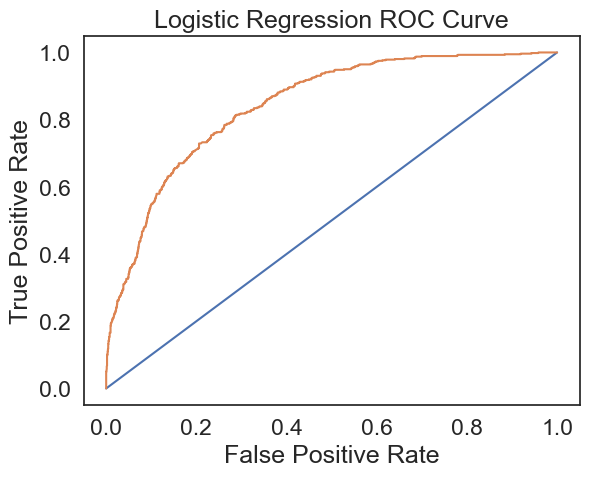

In [628]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
plt.plot([0,1],[0,1])#, 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()

In [629]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, y_pred_probs))

0.8433806411818792


In [630]:
def plotGraph(y_test,y_pred,regressorName):
    if max(y_test) >= max(y_pred):
        my_range = int(max(y_test))
    else:
        my_range = int(max(y_pred))
    plt.scatter(range(len(y_test)), y_test, color='blue', marker="^" ,alpha=0.2, label = 'actual')
    plt.scatter(range(len(y_pred)), y_pred, color='red', alpha=0.2, label = 'predicted')
    plt.legend(loc='best')
    plt.title(regressorName)
    plt.show()
    return


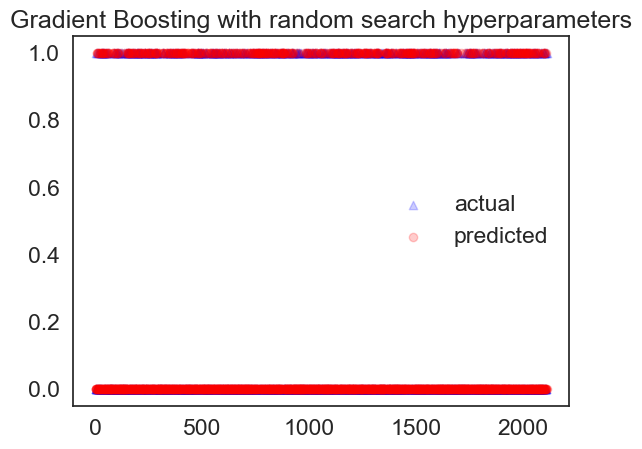

In [631]:
plotGraph(y_test, random_search_predictions_gb_2, "Gradient Boosting with random search hyperparameters")

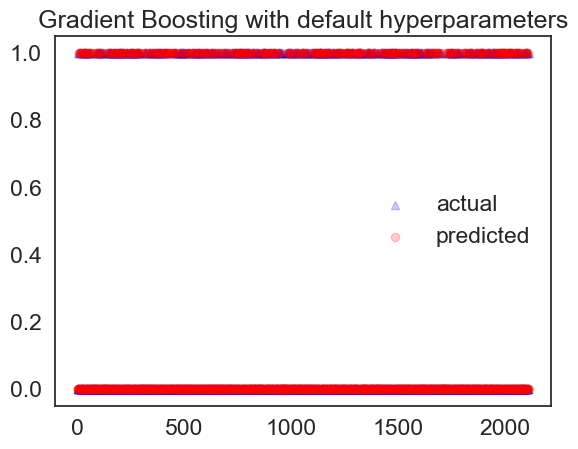

In [632]:
plotGraph(y_test, predictions_gb, "Gradient Boosting with default hyperparameters")